#Objetivos
### Exercitar os seguintes conceitos trabalhados no Módulo:

- Coleta de dados;
- Analisar e tratamento de dados;
- Criar visualização de dados;
- Implementar algoritmo de Machine Learning;
- Analisar resultados obtidos;
- Conhecimento teórico ministrado nas videoaulas.

#Enunciado
Uma empresa do ramo imobiliário quer criar um modelo preditivo que utiliza os
dados de valor do custo da diária e quantidade de pessoas. Ela possui uma base
de dados histórica que contém a quantidade pessoas e o valor cobrado no custo
da diária.
Diante disso, a empresa contratou uma consultoria de tecnologia para auxiliar
no processo de predição. Os analistas perceberam que a melhor abordagem
para esse problema é criar um algoritmo de Machine Learning de regressão.


#*Atividade*
#Para esta atividade, os alunos deverão criar um algoritmo de regressão linear
para prever o valor da diária de um imóvel baseado no número de pessoas.
1. Criar um projeto no google drive;
2. Coletar e inserir o arquivo custo_diaria.csv na plataforma;
3. Analisar os dados coletados;
4. Avaliar a relação entre as variáveis;
5. Criar algoritmo de regressão linear;
6. Responder as questões teóricas e práticas do trabalho.*texto em itálico*

Dicas:

1. Analisem com cuidado os dados através da representação gráfica;
2. Analisem bem o gráfico gerado e a disponibilização dos dados;
3. Antes de enviar as respostas verifiquem se o gabarito esteja correto;
4. Tenham atenção no que pede cada questão;
5. Os dados disponibilizados no dataset são fictícios. Ou seja, não tem
relação com o mundo real.
6. O dataset utilizado no trabalho podem ser obtidos no link:
https://github.com/ProfLeandroLessa/TP-M1-ABD


##importando as bibliotecas 

In [ ]:
import altair as alt
import pandas as pd # Trabalhar com tabelas e importação dos arquivos utilizados
import plotly.express as px # biblioteca para criar gráficos dinâmicos 
import seaborn as sns # biblioteca para gráficos 
import numpy as np #funções matemáticas de alto nível 

dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Arquivos Bootcamp IGTI/custo_diaria.csv', delimiter=";")

## Utilizando .head para visualizar os dados do arquivo importado

In [ ]:
# visualizando os dados do arquivos
dados.head

<bound method NDFrame.head of     qtd_pessoas  valor_diaria
0             1           150
1             3           200
2             4           650
3             6           499
4             7           549
5            10           980
6            12           700
7            13           735
8            15           859
9            16           900
10           20          1100
11           18           989
12           22          1075
13           23          1378
14           25          1500
15           27          1755
16           30          1850
17           32          2500
18           33          2000
19           40          1900
20           42          2089
21           43          2500
22           45          2250
23           47          2488
24           50          2680
25           51          2803
26           52          2890
27           53          3040
28           58          3150
29           60          3300>

## Criando um DataFrame e visualizando linhas e colunas


1.   Item da lista
2.   Item da lista


O arquivo contem, 2 colunas e 30 linhas, com isso vamos criar nosso primeiro gráfico.

In [ ]:
df = pd.DataFrame(dados)
df.shape

(30, 2)

### Utilizando .describe para descrever a contagem, meio, total, min, max e quartis dos dados apresentados no arquivo CSV.

In [ ]:
dados.describe()

,qtd_pessoas,valor_diaria
count,30.000000,30.000000
mean,28.600000,1648.633333
std,18.189804,950.522197
min,1.000000,150.000000
25%,13.500000,869.250000
50%,26.000000,1627.500000
75%,44.500000,2497.000000
max,60.000000,3300.000000


In [ ]:
alt.Chart(df).mark_line().encode(
    x='qtd_pessoas',
    y='valor_diaria')

alt.Chart(...)

Podemos concluir que quanto mais pessoas fazem reservas, mais caro fica o valor da diária.

Criando as variáveis que serão utilizadas no modelo X

In [ ]:
# criando variável independente  ##### ----->
X_custo_diaria = dados.iloc[:,0].values #buscamos todos os registros da primeira coluna e convertemos no formato de array
# o comando iloc permite selecionar um conjunto de registros. o dois pontos ":" significa que estamos selecionando todos os regisros e zero "0" a primeira coluna
X_custo_diaria

array([ 1,  3,  4,  6,  7, 10, 12, 13, 15, 16, 20, 18, 22, 23, 25, 27, 30,
       32, 33, 40, 42, 43, 45, 47, 50, 51, 52, 53, 58, 60])

Criando as variáveis que serão utilizadas no modelo Y

In [ ]:
# criando variável dependente (o que queremos predizer)
y_custo_diaria = dados.iloc[:,1].values
y_custo_diaria

array([ 150,  200,  650,  499,  549,  980,  700,  735,  859,  900, 1100,
        989, 1075, 1378, 1500, 1755, 1850, 2500, 2000, 1900, 2089, 2500,
       2250, 2488, 2680, 2803, 2890, 3040, 3150, 3300])

###**Correlação**

Correlação positiva: quando duas variáveis que possuem correlação crescem ou decrescem juntas, ou seja, que possuem uma relação direta;

Correlação negativa: quando duas variáveis que possuem correlação mas quando uma variável cresce a outra decresce, ou vice-versa;

Não ter correlação: quando o crescimento ou decrescimento de uma variável não tem efeito sobre outra variável.


Perceba que temos uma correlaçao forte positiva. Pois a medida que a quantidade de pessoas aumenta o preço da diária também aumenta. Além disso, podemos dizer que em 98% do valor cobrado pelas diárias pode ser explicado pela quantidade de pessoas alugando o imóvel.

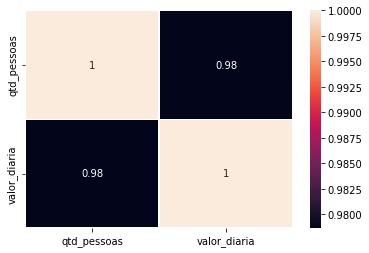

In [ ]:
correlation = dados.corr()
# plot da matriz de correlação
plot = sns.heatmap(correlation, annot = True,  linewidths=.3)
plot

###**Tratando os dados para o modelo**
Nesse passo vamos realizar transformações nos dados. Essa transformação deve ser feita para que os dados possam ter o formato que o algoritmo solicitada como entrada.

In [ ]:
# vizualizando o formato da variável
X_custo_diaria.shape # 

(30,)

In [ ]:
# visualizando variável
X_custo_diaria # o resultado mostra que temos uma array com apenas uma coluna/dimensão. NO entanto, precisamos ter uma matriz com 2 colunas

array([ 1,  3,  4,  6,  7, 10, 12, 13, 15, 16, 20, 18, 22, 23, 25, 27, 30,
       32, 33, 40, 42, 43, 45, 47, 50, 51, 52, 53, 58, 60])

In [ ]:
X_custo_diaria = X_custo_diaria.reshape(-1,1)
X_custo_diaria

array([[ 1],
       [ 3],
       [ 4],
       [ 6],
       [ 7],
       [10],
       [12],
       [13],
       [15],
       [16],
       [20],
       [18],
       [22],
       [23],
       [25],
       [27],
       [30],
       [32],
       [33],
       [40],
       [42],
       [43],
       [45],
       [47],
       [50],
       [51],
       [52],
       [53],
       [58],
       [60]])

In [ ]:
# Agora nós temos uma matriz com duas colunas. 30 linhas e 1 coluna
X_custo_diaria.shape 

(30, 1)

##Aplicando os dados ao algoritmo de machine de regressão

In [ ]:
from sklearn.linear_model import LinearRegression
# cria um objeto do tipo regressão linear
previsao_custo_diaria = LinearRegression()

In [ ]:
type(previsao_custo_diaria)

sklearn.linear_model._base.LinearRegression

## Realizando o Treinamento do modelo

In [ ]:
previsao_custo_diaria.fit(X_custo_diaria, y_custo_diaria)

LinearRegression()

In [ ]:
# Verfificando a interceptação  
previsao_custo_diaria.intercept_

186.00229281307384

In [ ]:
#Verificando o coeficiente angular da reta
previsao_custo_diaria.coef_

array([51.14094547])

In [ ]:
previsao_precos = previsao_custo_diaria.predict(X_custo_diaria)# baseado nos valores de nº de pessoas, vamos estimar/prever o custo do imóvel alugado

In [ ]:
#visualizando as previsões para cada nª de pessoas
previsao_precos

array([ 237.14323829,  339.42512923,  390.5660747 ,  492.84796565,
        543.98891112,  697.41174754,  799.69363849,  850.83458396,
        953.1164749 , 1004.25742038, 1208.82120227, 1106.53931132,
       1311.10309321, 1362.24403869, 1464.52592963, 1566.80782058,
       1720.230657  , 1822.51254794, 1873.65349341, 2231.64011172,
       2333.92200267, 2385.06294814, 2487.34483909, 2589.62673003,
       2743.04956645, 2794.19051192, 2845.3314574 , 2896.47240287,
       3152.17713023, 3254.45902118])

## Visualizando no gráfico as disposições dos dados
Para visualizar os dados no grafico, temos que transformar os valores das variáveis para o formato de vetor. Para isso utilizamos o comando ravel()

In [ ]:
# Verificando tipo da variável X_custo_diaria
X_custo_diaria

array([[ 1],
       [ 3],
       [ 4],
       [ 6],
       [ 7],
       [10],
       [12],
       [13],
       [15],
       [16],
       [20],
       [18],
       [22],
       [23],
       [25],
       [27],
       [30],
       [32],
       [33],
       [40],
       [42],
       [43],
       [45],
       [47],
       [50],
       [51],
       [52],
       [53],
       [58],
       [60]])

In [ ]:
X_custo_diaria.ravel() # transforma em um vetor

array([ 1,  3,  4,  6,  7, 10, 12, 13, 15, 16, 20, 18, 22, 23, 25, 27, 30,
       32, 33, 40, 42, 43, 45, 47, 50, 51, 52, 53, 58, 60])

In [ ]:
y_custo_diaria

array([ 150,  200,  650,  499,  549,  980,  700,  735,  859,  900, 1100,
        989, 1075, 1378, 1500, 1755, 1850, 2500, 2000, 1900, 2089, 2500,
       2250, 2488, 2680, 2803, 2890, 3040, 3150, 3300])

In [ ]:
grafico = px.scatter(x = X_custo_diaria.ravel(), y = y_custo_diaria)
grafico.show()

In [ ]:
grafico = px.scatter(x = X_custo_diaria.ravel(), y = y_custo_diaria)
grafico.add_scatter(x = X_custo_diaria.ravel(), y = previsao_precos, name= 'previsões')
grafico.show()

In [ ]:
# Verificando os valores de um determinada previsão baseada na quantidade de pessoas 
qtd_pessoas = 17
previsao_custo_diaria.intercept_ + previsao_custo_diaria.coef_ * qtd_pessoas

array([1055.39836585])

In [ ]:
qtd_pessoas = 25
previsao_custo_diaria.intercept_ + previsao_custo_diaria.coef_ * qtd_pessoas

array([1464.52592963])

In [ ]:
# Verificando de modo direto
previsao_custo_diaria.predict([[27]]) 

array([1566.80782058])

In [ ]:
#indica a qualidade do algoritmo (Quanto mais próximo de 1, melhor a qualidade do modelo)
previsao_custo_diaria.score(X_custo_diaria, y_custo_diaria)

0.9577871649322629

In [ ]:
# Visualizano os erros do modelo
from sklearn.metrics import mean_squared_error, mean_absolute_error
MSE = mean_squared_error(y_custo_diaria, previsao_precos)

In [ ]:
MSE

36867.67840031127

In [ ]:
#Calculando MAE 
mean_absolute_error(y_custo_diaria, previsao_precos)

138.91296481574125

In [ ]:
# Calculando RMSE
np.sqrt(MSE)

192.0095789285297

Correto >> está abaixo 

#Pergunta 1
1,67 / 1,67 pts
Com a superprodução dos dados, por que os métodos tradicionais se mostraram insuficientes?
   
Porque os servidores se tornaram obsoletos.
 
   
Porque houve uma mudança no modelo dos dados, que passaram a ser desestruturados.
 
Correto!
   
Porque os métodos tradicionais de coleta, armazenamento e processamento de dados começaram a não ser suficientes, causando problemas e gastos cada vez maiores para suprir as necessidades do negócio.
 
   
Porque os métodos atuais dispensam qualquer informação obtida no método tradicional.
 

#Pergunta 2
1,67 / 1,67 pts
Estão entre as vantagens do uso do Big Data, EXCETO:
   
Analisar o perfil de comportamento dos clientes e identificar oportunidades de vendas contínuas.
 
   
Acompanhar a aceitação de novos produtos ou serviços no mercado e tomar decisões a fim de potencializar ou corrigir problemas que possam acontecer de forma rápida e eficaz.
 
   
Monitorar ações de marketing em tempo real.
 
Correto!
   
Acompanhar a aceitação de novos produtos ou serviços no mercado e tomar decisões a fim de potencializar ou gerar problemas que possam acontecer de forma rápida e eficaz.
 
 
#Pergunta 3
1,67 / 1,67 pts
São dados gerados por pessoas:
   
Áudios ou vídeos compartilhados e ferramentas pessoais, como aplicativos em smartphones.
 
Correto!
   
Postagens nas redes sociais, mensagens enviadas em aplicativos, textos escritos em blogs, revistas ou páginas da web.
 
   
Postagens em redes sociais, câmeras e sistemas de segurança.
 
   
Dispositivos médicos, e-mails, registros de compras no cartão de crédito.
 
 
#Pergunta 4
1,67 / 1,67 pts
Quais são os três tipos de aprendizado de máquina?
   
O aprendizado virtual, aprendizado de máquina e reforço.
 
   
Nenhuma das alternativas.
 
   
O aprendizado natural, indutivo e por esforço.
 
Correto!
   
O aprendizado supervisionado, não supervisionado e o por reforço.
 
 
#Pergunta 5
1,67 / 1,67 pts
Qual é o desvio padrão obtido através da análise dos valores das diárias?
   
869.250
 
   
30.00
 
Correto!
   
950.52
 
   
1627.50
 
 
#Pergunta 6
1,67 / 1,67 pts
Qual é a média obtida através da análise da quantidade de pessoas?
   
18
 
   
44.5
 
   
Nenhuma das alternativas.
 
Correto!
   
28.6
 
 
#Pergunta 7
1,67 / 1,67 pts
Calcule a correlação entre as variáveis do dataset e responda a alternativa VERDADEIRA.
   
0.9786 correlação forte negativa.
 
   
1. correlação forte positiva.
 
Correto!
   
Nenhuma das alternativas.
 
   
0.9586 correlação neutra.
 
 
#Pergunta 8
1,67 / 1,67 pts
Qual o valor retornado intercept da previsão?
   
Nenhuma das alternativas.
 
   
196.00229281307384
 
Correto!
   
186.00229281307384
 
   
188.89115081
 
 
#Pergunta 9
1,67 / 1,67 pts
Qual é o valor do coeficiente angular da reta regressão?
   
Nenhuma das alternativas.
 
   
82.1408
 
   
186.00229281307384
 
Correto!
   
51.14094547
 
 
#Pergunta 10
1,67 / 1,67 pts
Qual o valor da previsão realizada pelo modelo de regressão para a qtd_pessoas = 17?
   
Nenhuma das alternativas.
 
Correto!
   
R$ 1055.39
 
   
R$ 1025.39
 
   
R$1035.39
 
 
#Pergunta 11
1,67 / 1,67 pts
Qual a diferença entre o valor predito e o valor real do valor da diária para a quantidade de pessoas = 25?
   
R$ 136,00
 
Correto!
   
R$36,00
 
   
R$1.464,00
 
   
Não é possível calcular.
 
 
#Pergunta 12
1,67 / 1,67 pts
Qual a diferença entre o valor predito e o valor real do valor da diária para a quantidade de pessoas = 27?
   
R$1.755,00
 
   
R$ 280,00
 
   
R$ 136,00
 
Correto!
   
R$189,00
 
 
#Pergunta 13
1,67 / 1,67 pts
Qual foi o score obtido pelo algoritmo de regressão?
   
0.9688
 
Correto!
   
0.9577
 
   
0.9872
 
   
0.8562
 
 
#Pergunta 14
1,67 / 1,67 pts
Qual o valor obtido para mean_absolute_error?
   
188.11
 
Correto!
   
138.91
 
   
192.00
 
   
36867
 
 
#Pergunta 15
1,62 / 1,62 pts
Qual o valor obtido para mean_squared_error?
   
192.00
 
Correto!
   
36867.67
 
   
368.67
 
   
138.91
